# **LIBRERÍA DE LIMPIEZA Y ANÁLISIS DE DATOS DE SALARIOS EN TECNOLOGÍA**
En el siguiente cuaderno, se busca tomar los datos de salarios en el sector de tecnología en Colombia, realizar un tratamiento, limpieza y visualización empleando las siguientes funciones:

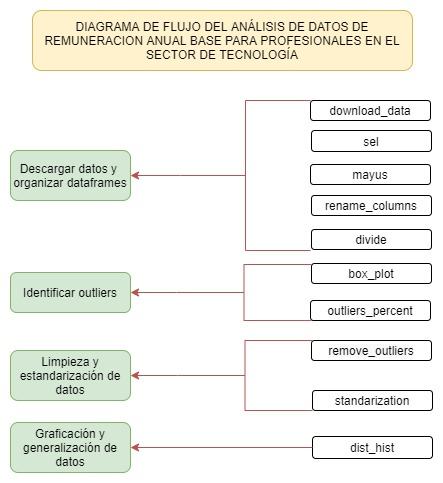

## 1.   Descargar datos y organizar DataFrames






In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats

In [ ]:
!git clone "https://github.com/bootcamp202011/salarios.git" 

fatal: destination path 'salarios' already exists and is not an empty directory.


In [ ]:
sys.path.insert(0,"/content/salarios")
import salaries_lib as sl

Celda para actualizar el código:

In [ ]:
!cd salarios/ && git pull 

Already up to date.


In [ ]:
path = sl.download_data("/content/salarios/salaries_data/raw/dataset.csv")
path

'/content/salarios/salaries_data/raw/dataset.csv'

In [ ]:
dataset_df = pd.read_csv(path)

In [ ]:
dataset_df.columns

Index(['Timestamp', '¿Para qué tipo de empresa trabaja?',
       'La empresa para la que usted trabaja se dedica principalmente a',
       '¿Cuantos años de fundada tiene la empresa para la que trabaja?',
       '¿Cuál es su título en la empresa?',
       '¿Se considera usted fundador en la empresa?',
       '¿Qué porcentaje de su tiempo laboral se ocupa en tareas relacionadas a desarrollo de software?',
       '¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de proyectos?',
       '¿Qué porcentaje de su tiempo laboral se ocupa en liderazgo técnico?',
       '¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de ingeniería?',
       '¿Cuánto tiempo lleva en su cargo actual (incluyendo freelance)?',
       '¿Cuántos años de experiencia en desarrollo de software profesional tiene?',
       '¿En cuál de los siguientes lenguajes de programación ocupa la mayoría de su tiempo laboral?',
       '¿En qué otros lenguajes de programación ocupa su tiempo laboral?',
       'Tipo d

In [ ]:
obj_df = sl.sel(dataset_df)
obj_df

,¿A usted le pagan en pesos colombianos (COP) o dólares (USD)?,"¿Usando la moneda de la respuesta anterior, cuánto es su remuneración ANUAL base? eg 36,000,000 si es pesos o 3,600 si es dólares"
0,pesos,32.3
1,dólares,290000000.0
2,dólares,72000.0
3,pesos,72000000.0
4,pesos,43200000.0
...,...,...
1698,dólares,12000.0
1699,pesos,114000000.0
1700,pesos,102000000.0
1701,dólares,42000.0


In [ ]:
salaries_df = sl.mayus(obj_df)

In [ ]:
salaries_df

,¿A USTED LE PAGAN EN PESOS COLOMBIANOS (COP) O DÓLARES (USD)?,"¿USANDO LA MONEDA DE LA RESPUESTA ANTERIOR, CUÁNTO ES SU REMUNERACIÓN ANUAL BASE? EG 36,000,000 SI ES PESOS O 3,600 SI ES DÓLARES"
0,pesos,32.3
1,dólares,290000000.0
2,dólares,72000.0
3,pesos,72000000.0
4,pesos,43200000.0
...,...,...
1698,dólares,12000.0
1699,pesos,114000000.0
1700,pesos,102000000.0
1701,dólares,42000.0


In [ ]:
type(salaries_df.columns)

pandas.core.indexes.base.Index

In [ ]:
dict_names = {'¿USANDO LA MONEDA DE LA RESPUESTA ANTERIOR, CUÁNTO ES SU REMUNERACIÓN ANUAL BASE?  EG 36,000,000 SI ES PESOS O 3,600 SI ES DÓLARES': "REMUNERACION ANUAL BASE", 
              "¿A USTED LE PAGAN EN PESOS COLOMBIANOS (COP) O DÓLARES (USD)?":"MONEDA"}

In [ ]:
ren_salaries_df = sl.rename_columns(salaries_df, dict_names)
ren_salaries_df

,MONEDA,REMUNERACION ANUAL BASE
0,pesos,32.3
1,dólares,290000000.0
2,dólares,72000.0
3,pesos,72000000.0
4,pesos,43200000.0
...,...,...
1698,dólares,12000.0
1699,pesos,114000000.0
1700,pesos,102000000.0
1701,dólares,42000.0


In [ ]:
pesos_df, dolar_df = sl.divide(ren_salaries_df)

In [ ]:
pesos_df.head()

,MONEDA,REMUNERACION ANUAL BASE
0,pesos,32.3
3,pesos,72000000.0
4,pesos,43200000.0
8,pesos,102000000.0
9,pesos,62400000.0


In [ ]:
dolar_df.head()

,MONEDA,REMUNERACION ANUAL BASE
1,dólares,290000000.0
2,dólares,72000.0
5,dólares,64800.0
6,dólares,21600.0
7,dólares,320.0


In [ ]:
dolar_df.describe()

,REMUNERACION ANUAL BASE
count,2.230000e+02
mean,5.274796e+06
std,4.209396e+07
min,3.200000e+02
25%,2.400000e+04
50%,4.920000e+04
75%,7.500000e+04
max,5.400000e+08


In [ ]:
pesos_df.describe()

,REMUNERACION ANUAL BASE
count,1.480000e+03
mean,6.756763e+13
std,2.599376e+15
min,3.230000e+01
25%,3.000000e+07
50%,5.400000e+07
75%,8.400000e+07
max,1.000000e+17


## 2.   Identificar outliers

In [ ]:
pesos_box_plot = sl.box_plot(pesos_df)

In [ ]:
type(pesos_box_plot)

altair.vegalite.v4.api.Chart

In [ ]:
dolar_box_plot = sl.box_plot(dolar_df)

In [ ]:
outliers_percent(dolar_df, "REMUNERACION ANUAL BASE", (1000, 300000))

4.0

In [ ]:
outliers_percent(pesos_df, "REMUNERACION ANUAL BASE", (3500000, 3e8))

4.0

## 3.   Limpieza y estandarización de datos

In [ ]:
pesos_no_outliers_df = sl.remove_outliers(pesos_df, "REMUNERACION ANUAL BASE", 3500000, 3e8)
dolar_no_outliers_df = sl.remove_outliers(dolar_df, "REMUNERACION ANUAL BASE", 1000, 300000)

In [ ]:
pesos_no_outliers_df.head()

,MONEDA,REMUNERACION ANUAL BASE
3,pesos,72000000.0
4,pesos,43200000.0
8,pesos,102000000.0
9,pesos,62400000.0
11,pesos,51000000.0


In [ ]:
print(pesos_df.size, pesos_no_outliers_df.size)
print(dolar_df.size, dolar_no_outliers_df.size)

2960 2856
446 428


In [ ]:
pesos_std = sl.standarization(pesos_no_outliers_df, "REMUNERACION ANUAL BASE")
pesos_std.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,REMUNERACION ANUAL BASE,REMUNERACION ANUAL BASE NORMALIZADA
count,1.428000e+03,1.428000e+03
mean,6.320164e+07,1.378741e-16
std,4.251427e+07,1.000350e+00
min,3.500000e+06,-1.404765e+00
25%,3.345000e+07,-7.000487e-01
50%,5.400000e+07,-2.165123e-01
75%,8.400000e+07,4.893802e-01
max,3.000000e+08,5.571807e+00


In [ ]:
dolar_std = sl.standarization(dolar_no_outliers_df, "REMUNERACION ANUAL BASE")
dolar_std.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,REMUNERACION ANUAL BASE,REMUNERACION ANUAL BASE NORMALIZADA
count,214.000000,2.140000e+02
mean,51491.565421,-6.381188e-17
std,36371.355513,1.002345e+00
min,1200.000000,-1.385967e+00
25%,24000.000000,-7.576298e-01
50%,48000.000000,-9.622275e-02
75%,70000.000000,5.100671e-01
max,240000.000000,5.195034e+00


## 4.   Graficación y generalización de datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


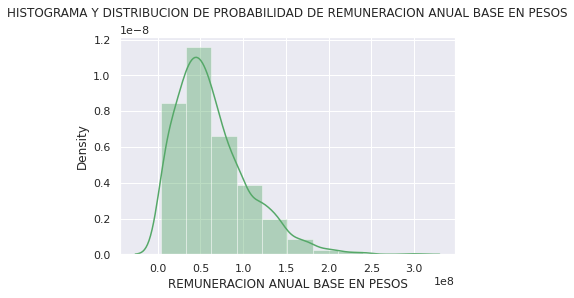

In [ ]:
pesos_dist = sl.dist_hist(pesos_no_outliers_df, "REMUNERACION ANUAL BASE")

In [ ]:
pesos_dist

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


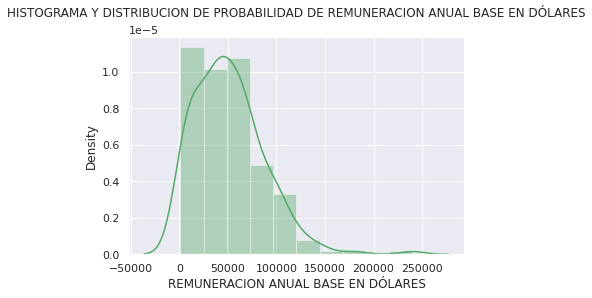

In [ ]:
dolar_dist = sl.dist_hist(dolar_no_outliers_df, "REMUNERACION ANUAL BASE")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


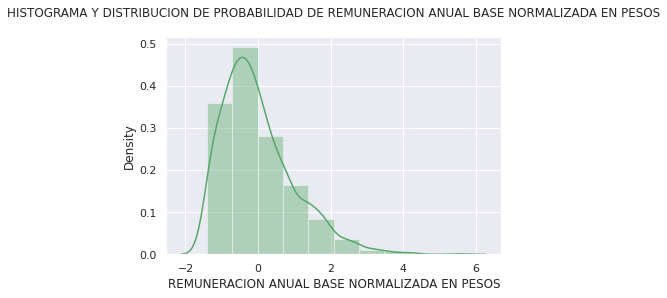

In [ ]:
pesos_dist = sl.dist_hist(pesos_std, "REMUNERACION ANUAL BASE NORMALIZADA")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


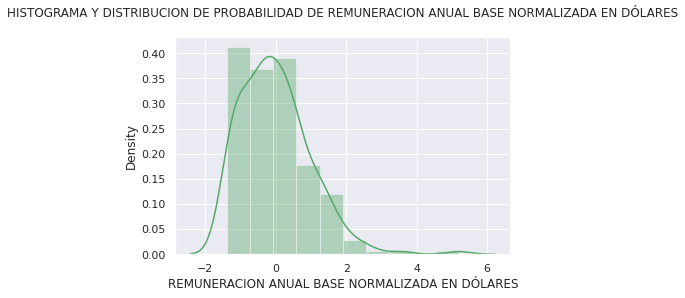

In [ ]:
dolar_dist = sl.dist_hist(dolar_std, "REMUNERACION ANUAL BASE NORMALIZADA")